In [1]:
###Web scrapping###

import requests
import pandas as pd

In [2]:
url = "https://www.worldometers.info/coronavirus/#countries"

In [3]:
html = requests.get(url).content

In [4]:
df_list = pd.read_html(html)

In [5]:
df = df_list[-1]

In [6]:
df.to_csv('covid.csv', index=False)

# EDA

In [7]:
df_covid = pd.read_csv('covid.csv')

In [8]:
import matplotlib.pyplot as plt

In [9]:
df_covid.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,1stcase
0,China,81394,+54,3295.0,+3,74971.0,3128,886.0,57.0,2.0,Jan 10
1,USA,123578,"+19,452",2221.0,+525,3231.0,118126,2666.0,373.0,7.0,Jan 20
2,Italy,92472,"+5,974",10023.0,+889,12384.0,70065,3856.0,1529.0,166.0,Jan 29
3,Spain,73235,"+7,516",5982.0,+844,12285.0,54968,4165.0,1566.0,128.0,Jan 30
4,Germany,57695,"+6,824",433.0,+82,8481.0,48781,1581.0,689.0,5.0,Jan 26


In [10]:
df_covid.shape

(202, 11)

In [11]:
df_covid.rename(columns = {'Country,Other':'Country',
                          'Serious,Critical':'Critical'
                          },inplace = True)

In [12]:
df_covid.head()

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,Critical,Tot Cases/1M pop,Deaths/1M pop,1stcase
0,China,81394,+54,3295.0,+3,74971.0,3128,886.0,57.0,2.0,Jan 10
1,USA,123578,"+19,452",2221.0,+525,3231.0,118126,2666.0,373.0,7.0,Jan 20
2,Italy,92472,"+5,974",10023.0,+889,12384.0,70065,3856.0,1529.0,166.0,Jan 29
3,Spain,73235,"+7,516",5982.0,+844,12285.0,54968,4165.0,1566.0,128.0,Jan 30
4,Germany,57695,"+6,824",433.0,+82,8481.0,48781,1581.0,689.0,5.0,Jan 26


Total number of countries 

In [13]:
df_covid.Country.count()

202

Total cases all over the world

In [14]:
df_covid.TotalCases.sum()

1326158

Total recover cases all over the world

In [15]:
df_covid.TotalRecovered.sum()

282952.0

Total deaths all over world

In [16]:
df_covid.TotalDeaths.sum()

61714.0

# COUNTRY VS TOTALDEATH

In [17]:
death = df_covid.sort_values(by = 'TotalDeaths', ascending = False).head(30).iloc[1:]

In [18]:
death.head()

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,Critical,Tot Cases/1M pop,Deaths/1M pop,1stcase
2,Italy,92472,"+5,974",10023.0,+889,12384.0,70065,3856.0,1529.0,166.0,Jan 29
3,Spain,73235,"+7,516",5982.0,+844,12285.0,54968,4165.0,1566.0,128.0,Jan 30
0,China,81394,+54,3295.0,+3,74971.0,3128,886.0,57.0,2.0,Jan 10
6,Iran,35408,"+3,076",2517.0,+139,11679.0,21212,3206.0,422.0,30.0,Feb 18
5,France,37575,"+4,611",2314.0,+319,5700.0,29561,4273.0,576.0,35.0,Jan 23


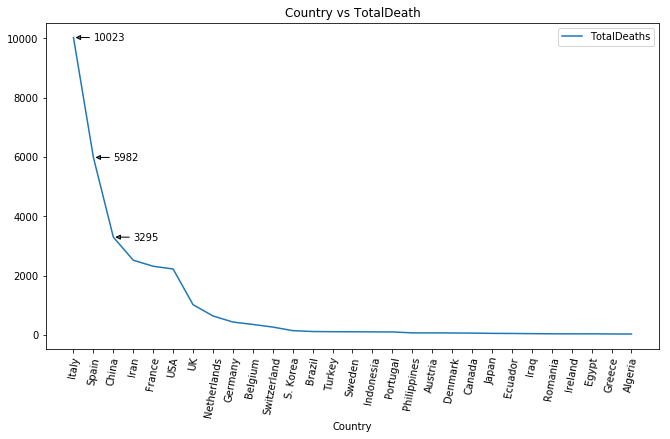

In [20]:
plt.figure(figsize=(11,6))
plt.plot(death['Country'],death['TotalDeaths'])
degree = 80
plt.xticks(rotation=degree)
plt.legend()
plt.xlabel('Country')
plt.title('Country vs TotalDeath')
plt.annotate(10023, 
             xy=('Italy', 10023),
             xytext = ('Spain',10023),
              arrowprops={'arrowstyle': '-|>'},
             va = 'center'
             ) 
plt.annotate(5982, 
             xy=('Spain', 5982),
             xytext = ('China', 5982),
              arrowprops={'arrowstyle': '-|>'},
             va = 'center'
             ) 
plt.annotate(3295, 
             xy=('China', 3295),
             xytext = ('Iran', 3295),
              arrowprops={'arrowstyle': '-|>'},
             va = 'center'
             ) 
plt.show()

# COUNTRY VS TOTALCASES

In [21]:
case = df_covid.sort_values(by = 'TotalCases', ascending = False).head(30).iloc[1:]

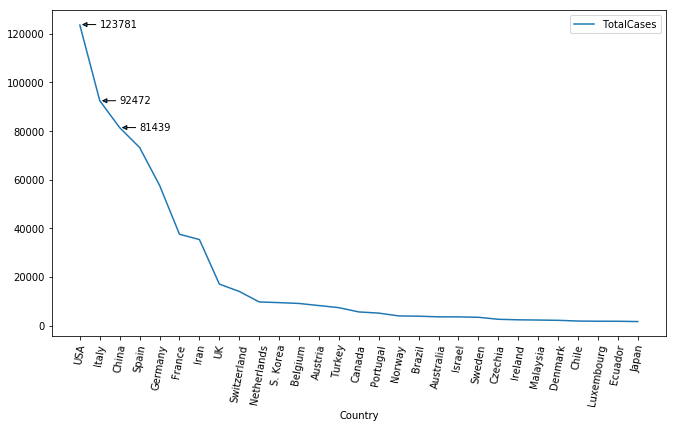

In [22]:
plt.figure(figsize=(11,6))
plt.plot(case['Country'],case['TotalCases'])
degree = 80
plt.xticks(rotation=degree)
plt.legend()
plt.xlabel('Country')
plt.annotate(92472, 
             xy=('Italy', 92472),
             xytext = ('China',92472),
              arrowprops={'arrowstyle': '-|>'},
             va = 'center'
             ) 
plt.annotate(123781, 
             xy=('USA', 123781),
             xytext = ('Italy', 123781),
              arrowprops={'arrowstyle': '-|>'},
             va = 'center'
             ) 
plt.annotate(81439, 
             xy=('China', 81439),
             xytext = ('Spain', 81439),
              arrowprops={'arrowstyle': '-|>'},
             va = 'center'
             ) 
plt.show()

# COUNTRY VS TOTALRECOVERED

In [23]:
recover = df_covid.sort_values(by = 'TotalRecovered', ascending = False).head(30).iloc[1:]

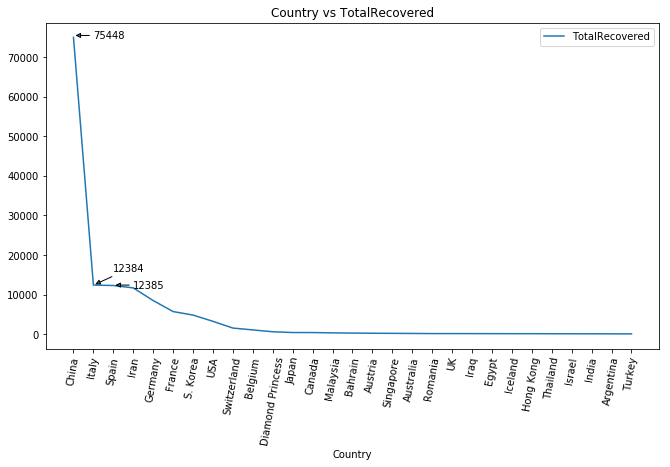

In [26]:
plt.figure(figsize=(11,6))
plt.plot(recover['Country'],recover['TotalRecovered'])
degree = 80
plt.xticks(rotation=degree)
plt.legend()
plt.xlabel('Country')
plt.title('Country vs TotalRecovered')
plt.annotate(12385, 
             xy=('Spain', 12385),
             xytext = ('Iran',12385),
              arrowprops={'arrowstyle': '-|>'},
             va = 'center'
             ) 
plt.annotate(12384, 
             xy=('Italy', 12384),
             xytext = ('Spain', 16500),
              arrowprops={'arrowstyle': '-|>'},
             va = 'center'
             ) 
plt.annotate(75448, 
             xy=('China', 75448),
             xytext = ('Italy', 75448),
              arrowprops={'arrowstyle': '-|>'},
             va = 'center'
             ) 
plt.show()